# Etapa 1: Importação das bibliotecas

In [183]:
!pip install -q imblearn

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix

from sklearn.neural_network import MLPClassifier,MLPRegressor

from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA

from scipy import stats
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Etapa 2: Importação da base de dados

In [114]:
data = pd.read_excel('dadospurosmultivariada.xls')

In [115]:
data

,X1,X2,X3,X4,X5,X6,X7,X8
0,10,725,1,4,0,87.0,2,2003
1,19,230,1,1,1,23.0,3,2003
2,25,800,1,3,1,45.0,2,2003
3,25,1290,1,1,1,34.0,2,2003
4,30,175,1,1,1,45.0,2,2003
...,...,...,...,...,...,...,...,...
1022,10,1010,12,1,1,24.0,2,2015
1023,17,1200,12,1,0,15.0,2,2015
1024,21,960,12,1,1,61.0,3,2015
1025,26,540,12,7,1,22.0,2,2015


In [116]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,10,725,1,4,0,87.0,2,2003
1,19,230,1,1,1,23.0,3,2003
2,25,800,1,3,1,45.0,2,2003
3,25,1290,1,1,1,34.0,2,2003
4,30,175,1,1,1,45.0,2,2003


In [117]:
data.tail()

,X1,X2,X3,X4,X5,X6,X7,X8
1022,10,1010,12,1,1,24.0,2,2015
1023,17,1200,12,1,0,15.0,2,2015
1024,21,960,12,1,1,61.0,3,2015
1025,26,540,12,7,1,22.0,2,2015
1026,30,420,12,2,0,41.0,2,2015


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1027 non-null   int64  
 1   X2      1027 non-null   int64  
 2   X3      1027 non-null   int64  
 3   X4      1027 non-null   int64  
 4   X5      1027 non-null   int64  
 5   X6      918 non-null    float64
 6   X7      1027 non-null   int64  
 7   X8      1027 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 64.3 KB


In [119]:
# todas variáveis faltantes fazem parte de x6
# é possível fazer regressão linear para combater os dados faltantes

In [120]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8
count,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,918.000000,1027.000000,1027.000000
mean,18.837390,818.194742,6.769231,2.877313,0.813048,42.177560,1.772152,2009.179163
std,103.885723,985.467242,3.437596,3.101993,0.390063,16.969151,1.158360,3.628595
min,1.000000,0.000000,1.000000,0.000000,0.000000,11.000000,0.000000,2003.000000
25%,8.000000,544.000000,4.000000,1.000000,1.000000,28.000000,1.000000,2006.000000
50%,15.000000,760.000000,7.000000,1.000000,1.000000,40.000000,2.000000,2009.000000
75%,23.000000,1067.500000,10.000000,4.000000,1.000000,54.000000,2.000000,2012.000000
max,3333.000000,25920.000000,12.000000,12.000000,1.000000,99.000000,5.000000,2015.000000


# Etapa 3: Limpeza e visualização dos dados

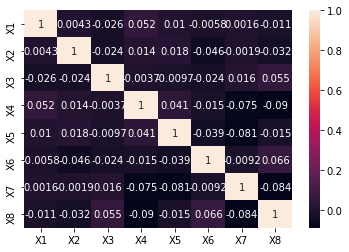

In [121]:
sns.heatmap(data.corr(), annot = True);

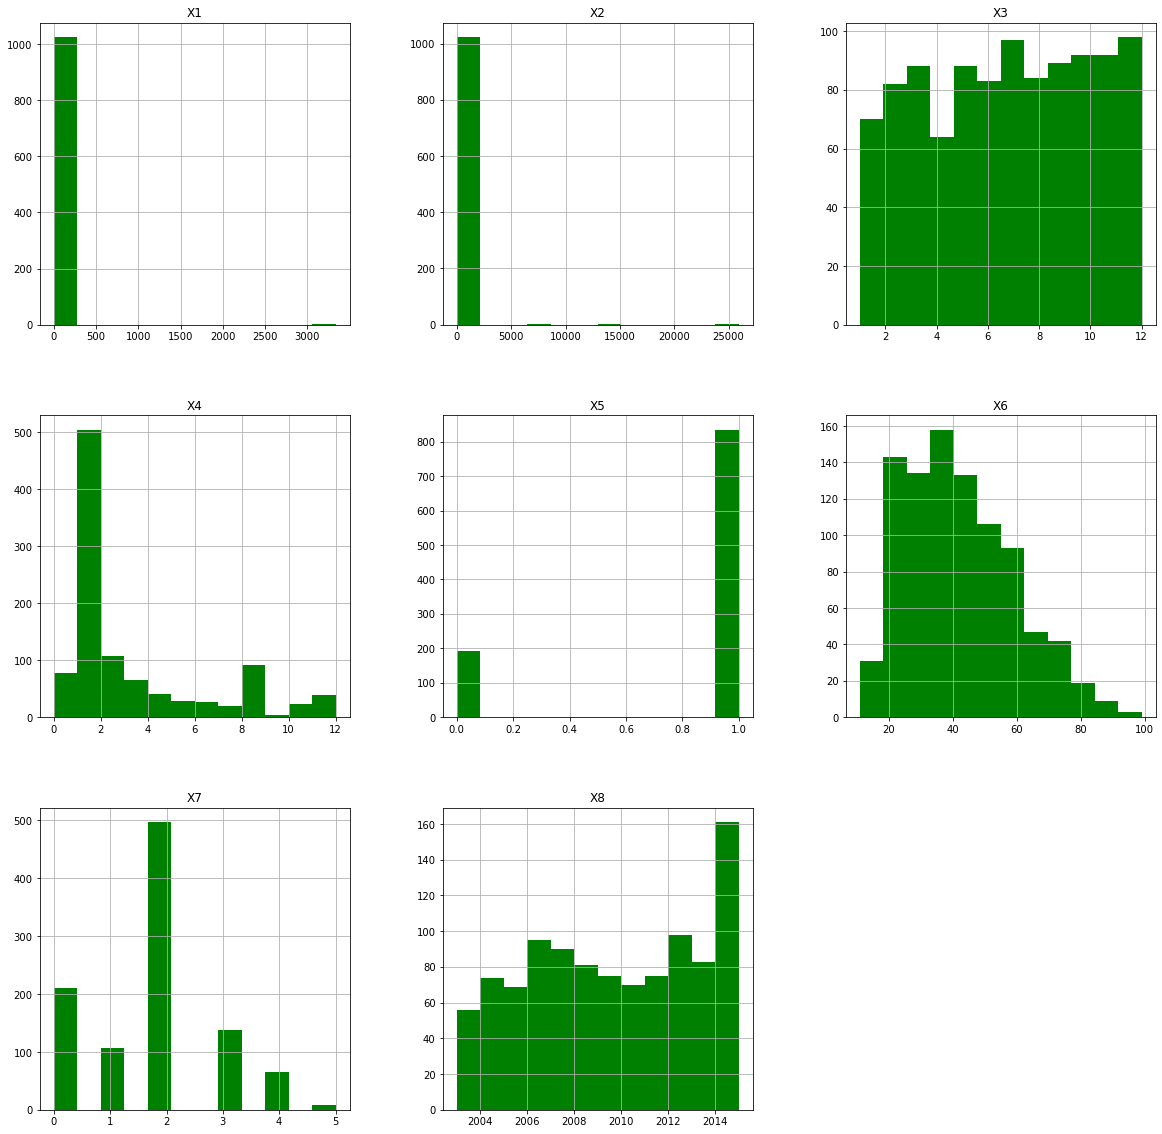

In [122]:
data.hist(bins = 12, figsize = (20,20), color = 'g');


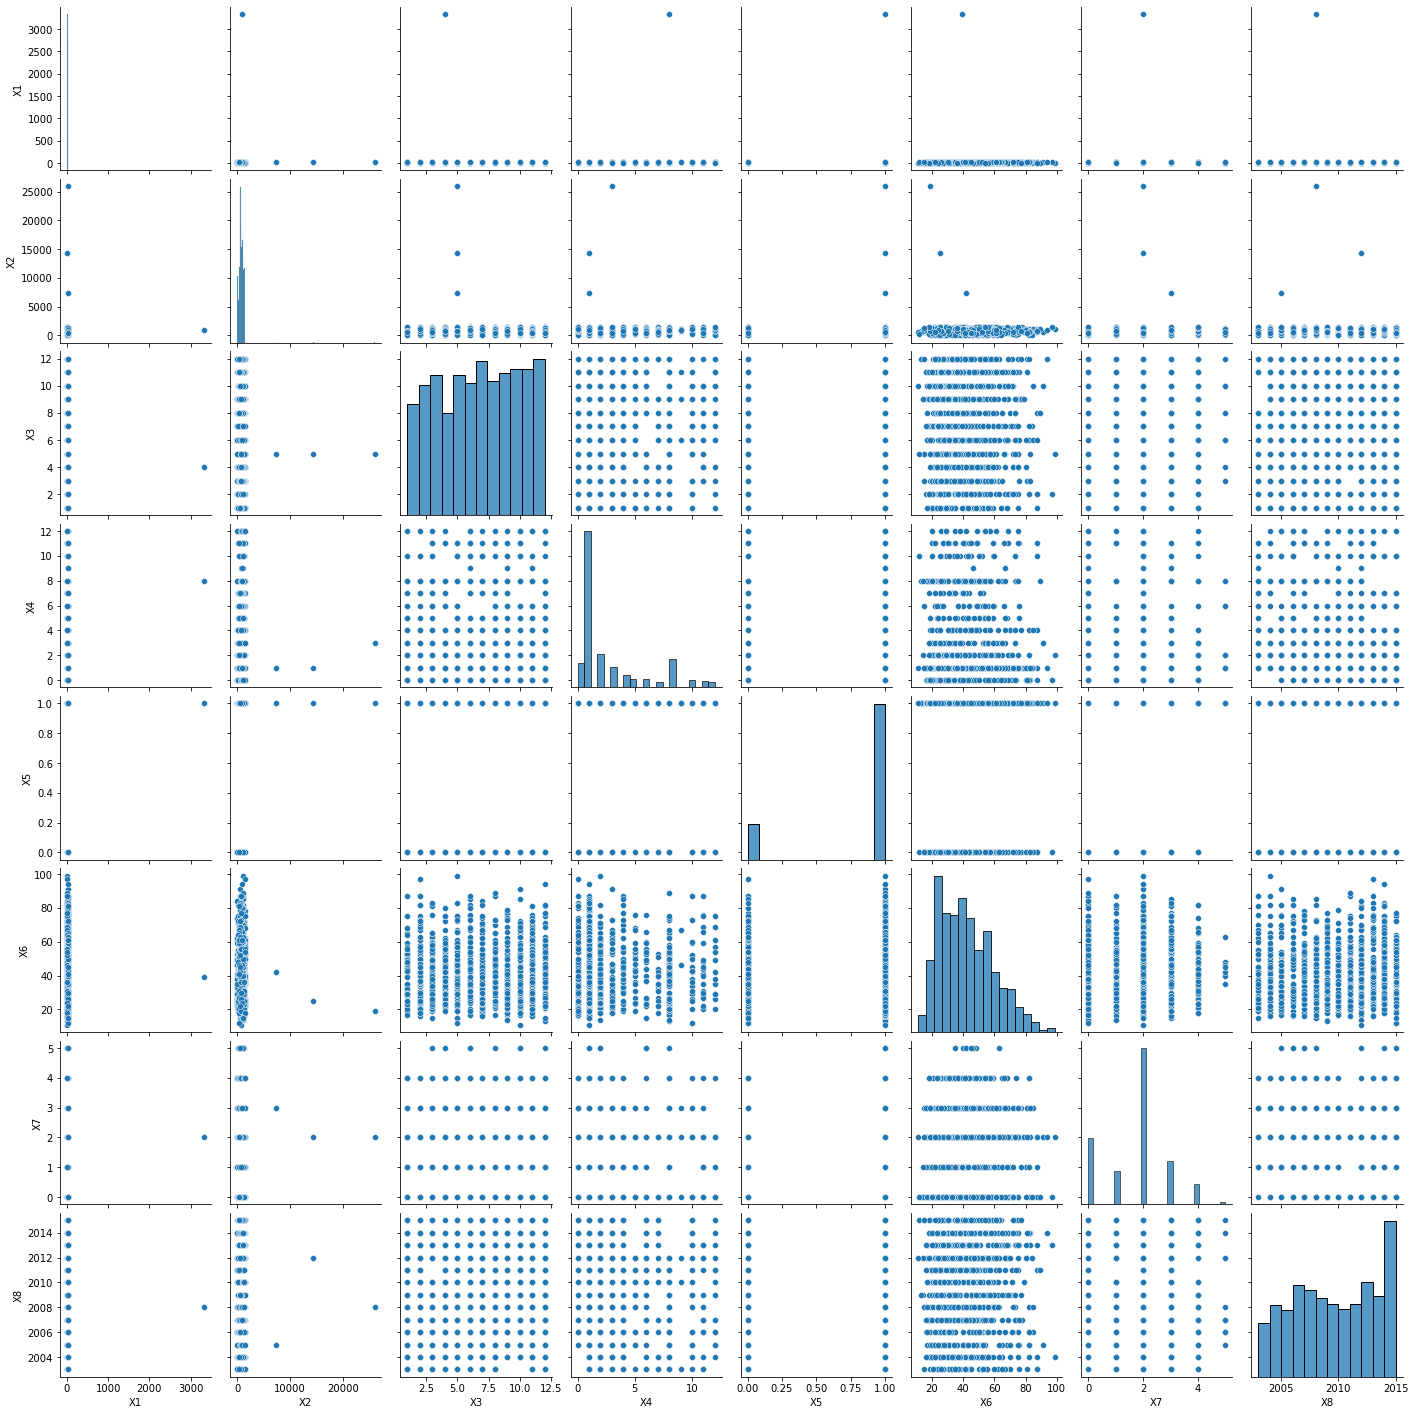

In [123]:
sns.pairplot(data);

# Etapa 4: Tratamento da base de dados

In [124]:
data_sem_na = data.dropna()

In [125]:
#selecionei todas as variaveis menos x6 pois tentarei prever x6
selected_features = ['X1','X2','X3','X4','X5','X7','X8']
X = data_sem_na[selected_features]
#falta construir filtro para o dataset 
#se x6 for NA retire a linha do dataset
# dps coloca um drop NA e oq sobrar é y
y = data_sem_na['X6']

In [126]:
data

,X1,X2,X3,X4,X5,X6,X7,X8
0,10,725,1,4,0,87.0,2,2003
1,19,230,1,1,1,23.0,3,2003
2,25,800,1,3,1,45.0,2,2003
3,25,1290,1,1,1,34.0,2,2003
4,30,175,1,1,1,45.0,2,2003
...,...,...,...,...,...,...,...,...
1022,10,1010,12,1,1,24.0,2,2015
1023,17,1200,12,1,0,15.0,2,2015
1024,21,960,12,1,1,61.0,3,2015
1025,26,540,12,7,1,22.0,2,2015


In [127]:
data_sem_na 

,X1,X2,X3,X4,X5,X6,X7,X8
0,10,725,1,4,0,87.0,2,2003
1,19,230,1,1,1,23.0,3,2003
2,25,800,1,3,1,45.0,2,2003
3,25,1290,1,1,1,34.0,2,2003
4,30,175,1,1,1,45.0,2,2003
...,...,...,...,...,...,...,...,...
1022,10,1010,12,1,1,24.0,2,2015
1023,17,1200,12,1,0,15.0,2,2015
1024,21,960,12,1,1,61.0,3,2015
1025,26,540,12,7,1,22.0,2,2015


In [128]:
X.head()

,X1,X2,X3,X4,X5,X7,X8
0,10,725,1,4,0,2,2003
1,19,230,1,1,1,3,2003
2,25,800,1,3,1,2,2003
3,25,1290,1,1,1,2,2003
4,30,175,1,1,1,2,2003


In [129]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [130]:
X_scaled

array([[0.00270108, 0.02797068, 0.        , ..., 0.        , 0.4       ,
        0.        ],
       [0.00540216, 0.00887346, 0.        , ..., 1.        , 0.6       ,
        0.        ],
       [0.00720288, 0.0308642 , 0.        , ..., 1.        , 0.4       ,
        0.        ],
       ...,
       [0.0060024 , 0.03703704, 1.        , ..., 1.        , 0.6       ,
        1.        ],
       [0.007503  , 0.02083333, 1.        , ..., 1.        , 0.4       ,
        1.        ],
       [0.00870348, 0.0162037 , 1.        , ..., 0.        , 0.4       ,
        1.        ]])

In [131]:
X_scaled.shape

(918, 7)

# tentativas de regressão com mlp regressor

In [132]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [133]:
model = MLPRegressor(activation='relu', max_iter=10000,solver ='adam',hidden_layer_sizes = (100))
model.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=100, max_iter=10000)

In [134]:
y_pred = model.predict(x_test)

In [135]:
y_pred

array([46.73523308, 41.73217448, 42.07748437, 41.53186717, 42.36850724,
       44.40811353, 46.70428178, 43.0550924 , 41.04434819, 41.9481933 ,
       43.22324099, 41.12031067, 45.52153925, 42.94647838, 41.20002375,
       46.46578325, 42.20297871, 41.57603972, 45.07057637, 42.58669451,
       42.3813611 , 43.47113415, 39.20706437, 42.14194515, 43.36860572,
       41.49768486, 43.41130954, 42.47315212, 43.77649783, 42.04226652,
       42.94734816, 43.0339564 , 43.33391947, 42.86679073, 44.55977698,
       43.8504545 , 45.14378854, 42.43235015, 40.72373839, 45.33945531,
       43.15823823, 42.75122993, 45.90225548, 40.88054912, 46.54760199,
       46.47597865, 42.77573619, 44.50151591, 42.8122775 , 43.91068311,
       44.52562321, 43.90912656, 44.03310667, 45.13405535, 38.84604549,
       45.66326833, 41.01645304, 43.28558374, 47.28746099, 45.36725527,
       42.42653798, 40.22525275, 41.81561685, 44.09629709, 40.90618166,
       43.28076959, 42.13882345, 46.98736726, 39.954081  , 42.25

In [136]:
mean_absolute_error(y_test,y_pred)

12.629481753709388

In [137]:
r2_score(y_test,y_pred)

0.0053793402147810365

In [138]:
model.score(x_test,y_test)

0.0053793402147810365

In [139]:
y_test

796    63.0
726    61.0
315    58.0
742    41.0
189    43.0
       ... 
371    31.0
738    84.0
671    31.0
210    29.0
132    42.0
Name: X6, Length: 184, dtype: float64

In [140]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print(f"Train MSE : {0.5*np.mean((y_train-y_train_pred)**2)}")
print(f"Test MSE : {0.5*np.mean((y_test-y_test_pred)**2)}")

Train MSE : 146.846633761651
Test MSE : 118.89793078211282


# Tentativa Knn

In [141]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
  
    training_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [142]:
# melhor score no test está horripilante
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.5313351498637602, 0.0]
3 : [0.3542234332425068, 0.005434782608695652]
4 : [0.29291553133514986, 0.0]
5 : [0.2547683923705722, 0.010869565217391304]
6 : [0.23024523160762944, 0.010869565217391304]
7 : [0.20844686648501362, 0.010869565217391304]
8 : [0.1880108991825613, 0.016304347826086956]
9 : [0.17302452316076294, 0.010869565217391304]
10 : [0.16621253405994552, 0.010869565217391304]
11 : [0.167574931880109, 0.016304347826086956]
12 : [0.15940054495912806, 0.010869565217391304]
13 : [0.14032697547683923, 0.021739130434782608]
14 : [0.1335149863760218, 0.016304347826086956]
15 : [0.12942779291553133, 0.016304347826086956]
16 : [0.11989100817438691, 0.016304347826086956]
17 : [0.11580381471389646, 0.021739130434782608]
18 : [0.10354223433242507, 0.016304347826086956]
19 : [0.10490463215258855, 0.016304347826086956]
20 : [0.10217983651226158, 0.016304347826086956]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


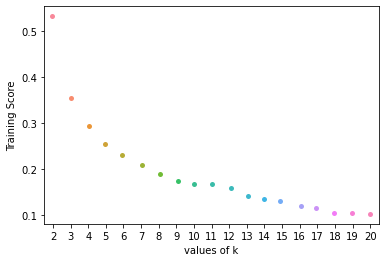

In [143]:
#o melhor numero de k é 2
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')  
  
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


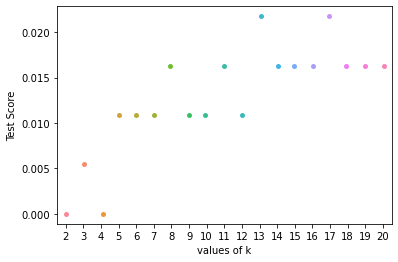

In [144]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

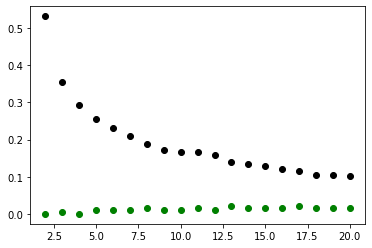

In [145]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()
# maior valor em 2

# Tentativa pca

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
x_standard = StandardScaler().fit_transform(X)

In [148]:
#usando apenas 2 componentes
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x_standard)

In [149]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [150]:
principalDf

,principal component 1,principal component 2
0,1.260815,2.103244
1,1.118047,1.603920
2,1.732651,0.891300
3,1.477960,1.030287
4,1.226815,0.981427
...,...,...
913,-1.662261,-0.902303
914,-2.194215,0.373546
915,-1.733549,-0.290712
916,-0.614783,-1.281437


# Usando mediana para preencher dados faltantes

In [151]:
mediana_x6 = data.X6.median()

In [152]:
data.fillna(mediana_x6, inplace = True)

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1027 non-null   int64  
 1   X2      1027 non-null   int64  
 2   X3      1027 non-null   int64  
 3   X4      1027 non-null   int64  
 4   X5      1027 non-null   int64  
 5   X6      1027 non-null   float64
 6   X7      1027 non-null   int64  
 7   X8      1027 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 64.3 KB


## Verificando balancemanto dos dados categóricos

1    835
0    192
Name: X5, dtype: int64

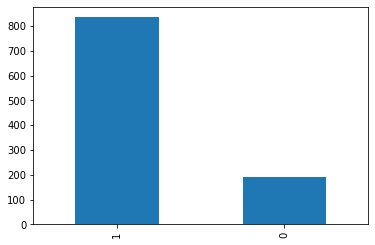

In [173]:
data.X5.value_counts().plot.bar()
data.X5.value_counts()

12    98
7     97
11    92
10    92
9     89
5     88
3     88
8     84
6     83
2     82
1     70
4     64
Name: X3, dtype: int64

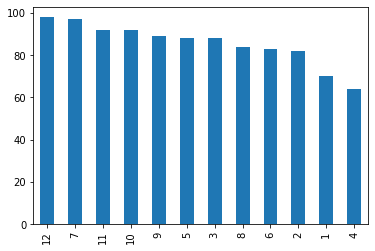

In [174]:
data.X3.value_counts().plot.bar()
data.X3.value_counts()

1     505
2     107
8      92
0      78
3      66
4      40
5      28
6      26
10     24
11     22
7      19
12     17
9       3
Name: X4, dtype: int64

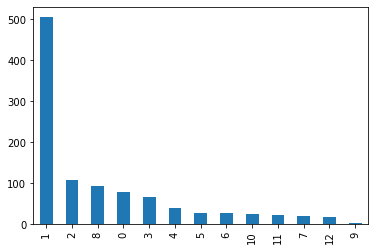

In [175]:
data.X4.value_counts().plot.bar()
data.X4.value_counts()

2    497
0    211
3    138
1    107
4     65
5      9
Name: X7, dtype: int64

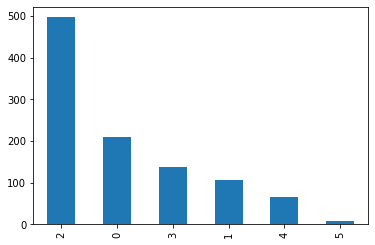

In [176]:
data.X7.value_counts().plot.bar()
data.X7.value_counts()

## Teste de normalidade

In [177]:
def teste_normalidade(data):
    alpha = 0.05 # confiança
    
    for column in data.columns.values:
        k2, p = stats.normaltest(data[column])

        if(p < alpha):
            # Hipotese nula
            print(column, ': Segue distribuição normal')
        else:
            # Hipotese alternativa
            print(column, ': não segue distribuição normal')


In [178]:
teste_normalidade(data)

X1 : Segue distribuição normal
X2 : Segue distribuição normal
X3 : Segue distribuição normal
X4 : Segue distribuição normal
X5 : Segue distribuição normal
X6 : Segue distribuição normal
X7 : não segue distribuição normal
X8 : Segue distribuição normal


## Testando regressão logistica

Como X5 é variável binária, tentaremos utilizar as outras variáveis para predizer ela

In [179]:
data.X5.value_counts()

1    835
0    192
Name: X5, dtype: int64

In [180]:
X_train,X_test,y_train,y_test = train_test_split(data.drop('X5', 1), data.X5, test_size=0.25, random_state=0)

In [181]:
model = LogisticRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

<AxesSubplot:>

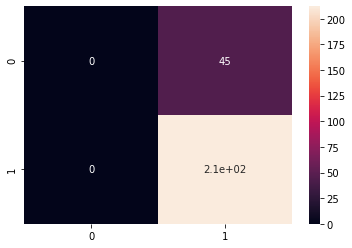

In [182]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)

In [161]:
print('Acurácia do modelo: ', accuracy_score(y_test, y_pred))
plt.show()

Acurácia do modelo:  0.8249027237354085


# 1 - Balanceando os dados (Undersampling)

In [229]:
# Undersampling...
rus = RandomUnderSampler()
X_res, y_res = rus.fit_sample(data.drop('X5', 1), data.X5)

1    192
0    192
Name: X5, dtype: int64

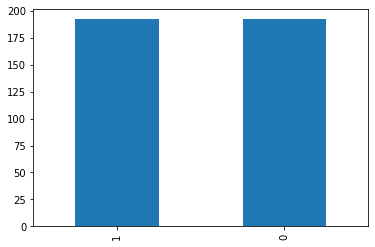

In [230]:
# Label: X5
y_res.value_counts().plot.bar()
y_res.value_counts()

#### Testando Regressão logistica após o balanceamento dos dados


In [231]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

In [232]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<AxesSubplot:>

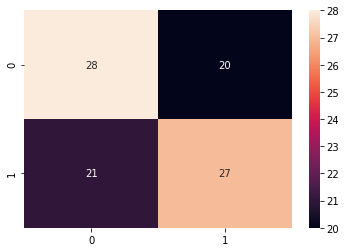

In [233]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)

In [209]:
print('Acurácia do modelo: ', accuracy_score(y_test, y_pred))
plt.show()

Acurácia do modelo:  0.5520833333333334


# 2- Testando o Oversampling

In [215]:
over = RandomOverSampler()
X_res, y_res = over.fit_sample(data.drop('X5', 1), data.X5)

1    835
0    835
Name: X5, dtype: int64

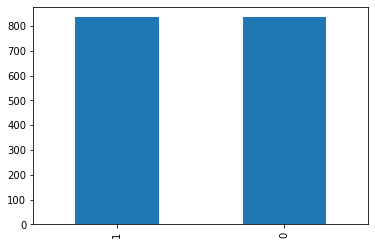

In [216]:
# label: X5
y_res.value_counts().plot.bar()
y_res.value_counts()

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

In [219]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<AxesSubplot:>

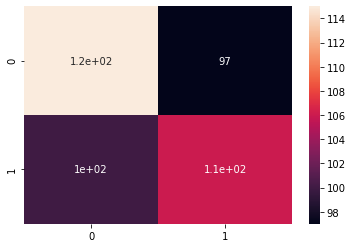

In [220]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)

In [221]:
print('Acurácia do modelo: ', accuracy_score(y_test, y_pred))
plt.show()

Acurácia do modelo:  0.5287081339712919
